## A)Linear regression : Single feature vs Multiple features 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel('Real estate valuation data set.xlsx', index_col="No")

In [3]:
df.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
No,,,,,,,
1,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
2,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
3,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
4,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
5,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1


In [4]:
df.columns

Index(['X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude',
       'Y house price of unit area'],
      dtype='object')

In [5]:
print(f"Number of null values: {df.isnull().sum()}")

Number of null values: X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64


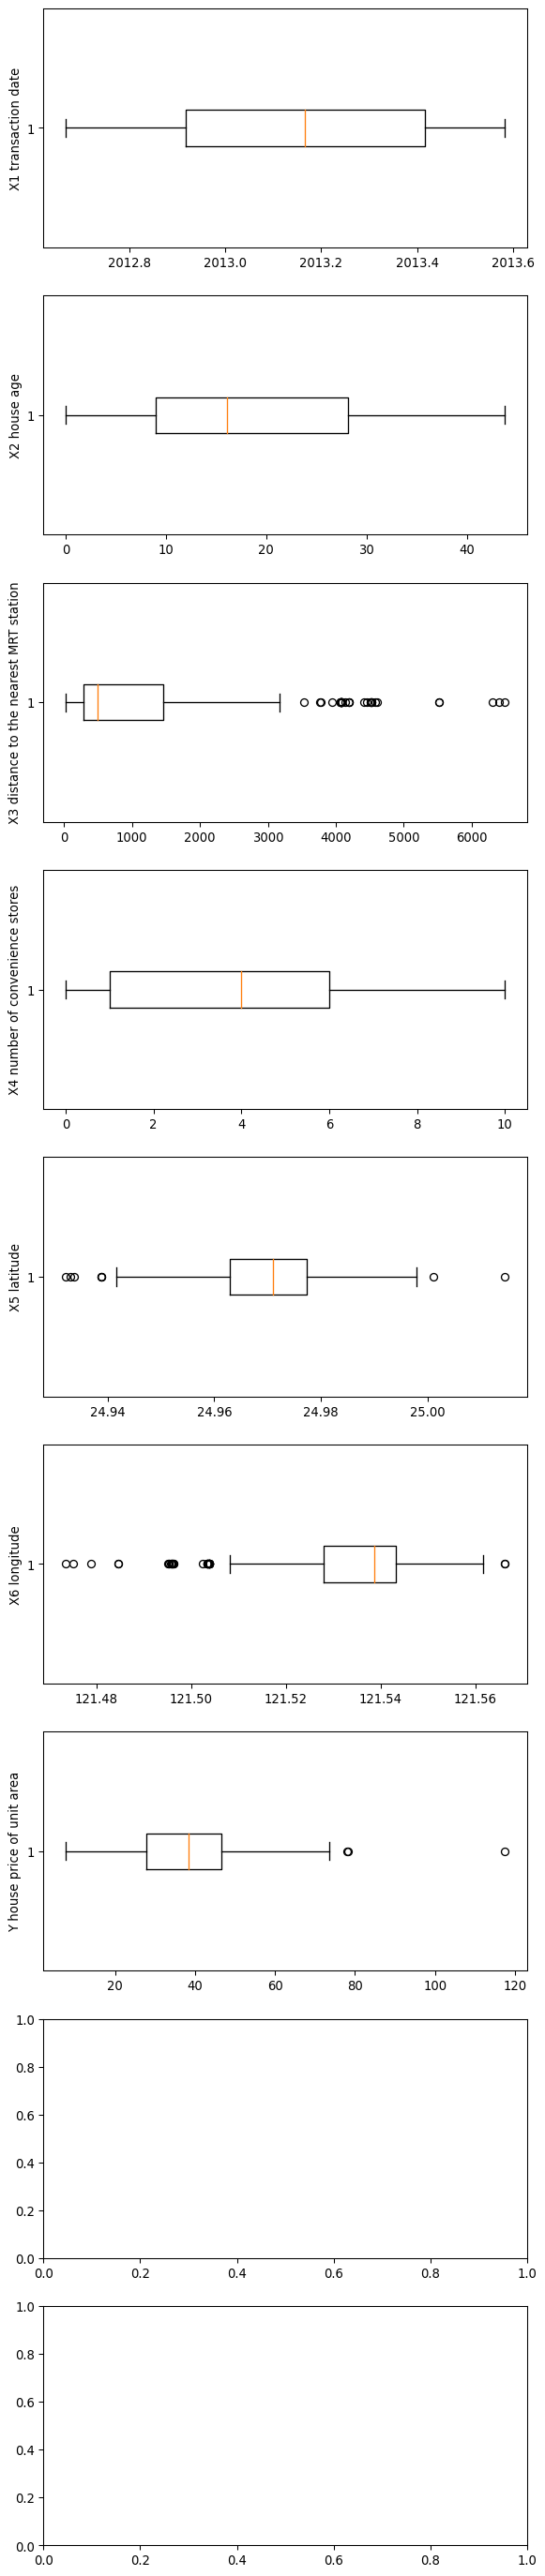

In [6]:
# Box Plots
fig, axs = plt.subplots(9,1,dpi=95, figsize=(7,37))
i = 0
for col in df.columns:
    axs[i].boxplot(df[col], vert=False)
    axs[i].set_ylabel(col)
    i+=1
plt.show()

### Standardization and Normalization

In [7]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [8]:
standard_scaler = StandardScaler()
min_max_scaler = MinMaxScaler()

In [9]:
# Normalize X
df_normalized = pd.DataFrame(min_max_scaler.fit_transform(df), columns=df.columns)

# Standardize X
df_standardized = pd.DataFrame(standard_scaler.fit_transform(df_normalized), columns=df.columns)

df_preprocessed = df_standardized

In [10]:
print(f"Min:\n{df_preprocessed.min()}")
print('------------------')
print(f"Max:\n{df_preprocessed.max()}")
print('------------------')
print(f"Std:\n{df_preprocessed.std()}")
print('------------------')

Min:
X1 transaction date                      -1.712334
X2 house age                             -1.556639
X3 distance to the nearest MRT station   -0.841279
X4 number of convenience stores          -1.391638
X5 latitude                              -2.981805
X6 longitude                             -3.903223
Y house price of unit area               -2.235474
dtype: float64
------------------
Max:
X1 transaction date                       1.542244
X2 house age                              2.292652
X3 distance to the nearest MRT station    4.287008
X4 number of convenience stores           2.007407
X5 latitude                               3.675611
X6 longitude                              2.146891
Y house price of unit area                5.851328
dtype: float64
------------------
Std:
X1 transaction date                       1.00121
X2 house age                              1.00121
X3 distance to the nearest MRT station    1.00121
X4 number of convenience stores           1.00121
X5 

In [11]:
target_col = df.columns[6]
print(f"Target col: {target_col}")
X = df_preprocessed.drop(target_col, axis=1)
y = df_preprocessed[target_col]

Target col: Y house price of unit area


### Train test split

In [12]:
from sklearn.model_selection import train_test_split

# Split the data into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
print(f"X:{X.shape}\ntrain:{X_train.shape}\ntest:{X_test.shape}")
print("-----------------")
print(f"y:{y.shape}\ntrain:{y_train.shape}\ntest:{y_test.shape}")

X:(414, 6)
train:(331, 6)
test:(83, 6)
-----------------
y:(414,)
train:(331,)
test:(83,)


In [14]:
X_train.min()

X1 transaction date                      -1.712334
X2 house age                             -1.556639
X3 distance to the nearest MRT station   -0.841279
X4 number of convenience stores          -1.391638
X5 latitude                              -2.981805
X6 longitude                             -3.796886
dtype: float64

In [15]:
X_train

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
192,0.062891,2.292652,-0.814143,0.987694,-0.123441,0.478119
234,0.358761,-0.853573,0.898572,-0.032020,-0.722866,-1.288509
5,-1.712334,-0.932668,0.865586,-0.371925,-0.482451,-1.358313
45,-0.232980,1.659892,-0.472056,1.327598,0.090352,0.755378
245,0.950503,-0.897514,-0.352429,0.307885,0.286395,0.964137
...,...,...,...,...,...,...
71,-0.232980,1.563220,-0.351541,-0.371925,0.532458,0.247179
106,-0.232980,-0.045046,-0.709486,1.327598,0.648632,0.634036
270,0.654632,-0.607499,-0.659459,-1.051734,0.449362,-0.189259
348,-1.120593,-1.152376,-0.653844,0.647789,0.550207,0.769730


In [16]:
y_train

192    0.347299
234   -1.036067
5     -0.432684
45     0.023532
245    0.207491
         ...   
71     0.207491
106    0.671065
270    5.851328
348    1.156715
102    1.208223
Name: Y house price of unit area, Length: 331, dtype: float64

### Train a linear regression model

In [17]:
from sklearn.linear_model import LinearRegression

In [18]:
model = LinearRegression()

In [19]:
model.fit(X_train, y_train)

LinearRegression()

In [20]:
from sklearn.metrics import mean_squared_error

y_pred = model.predict(X_train)
test_mse = mean_squared_error(y_train, y_pred)
print(f"Train Mean Squared Error (MSE): {test_mse}")

y_pred = model.predict(X_test)
test_mse = mean_squared_error(y_test, y_pred)
print(f"Test Mean Squared Error (MSE): {test_mse}")

Train Mean Squared Error (MSE): 0.45000423774495146
Test Mean Squared Error (MSE): 0.2896878551924997


In [21]:
# provide a general multiple linear regression equation and explain all the terms. 


### Multiple Linear Regression Equation:

 y = beta_0 + beta_1*x_1 + beta_2*x_2 + ..... + beta_p*x_p + epsilon

### Explanation of Terms:

- y : This is the dependent variable, or the variable we are trying to predict. In a regression context, it's also called the response variable.

- beta_0: This is the intercept term, representing the value of  y when all independent variables  x_1, x_2,..., x_p are zero. It's the point where the regression line intersects the y-axis.

- beta_1, beta_2,...., beta_p: These are the coefficients associated with each independent variable. They represent the change in the dependent variable y  for a one-unit change in the corresponding independent variable, holding all other variables constant. These coefficients are also known as regression coefficients or parameters.

- x_1, x_2, ...., x_p: These are the independent variables, also known as predictor variables or features. They are the variables used to predict the dependent variable  y.

- epsilon: This represents the error term or residual, which accounts for the variability in  y  that cannot be explained by the linear relationship with the independent variables. It captures all other factors influencing the dependent variable that are not included in the model.



<!-- Explain the concept of a dummy variable and how such variables are calculated. Why is it necessary to convert nominal variables to dummy variables when performing linear regression? -->

In [25]:
# Explain the concept of a dummy variable and how such
# variables are calculated. Why is it necessary to convert nominal 
# variables to dummy variables when performing linear regression?

### b. Explanation of Dummy Variables:

**Concept of a Dummy Variable:**

A dummy variable, also known as an indicator variable, is a variable that takes on the value of 0 or 1 to indicate the presence or absence of some categorical effect that may be expected to shift the outcome. Dummy variables are used in regression analysis to represent categorical data numerically.

**Calculation of Dummy Variables:**

1. **Select Categories:** Identify the categories within the categorical variable. For example, if the categorical variable is "gender," the categories could be "male" and "female."
  
2. **Create Dummy Variables:** Create a binary variable for each category. Each dummy variable will take the value 1 if the observation belongs to that category, and 0 otherwise. For example, if there are two categories "male" and "female," you would create two dummy variables: one for "male" and one for "female."

3. **Assign Values:** Assign 1 to the dummy variable corresponding to the category to which the observation belongs and 0 to the dummy variables corresponding to the other categories. For example, if an observation is "male," the "male" dummy variable would be 1, and the "female" dummy variable would be 0.

**Necessity of Dummy Variables in Linear Regression:**

It's necessary to convert nominal variables (categorical variables without any inherent order) to dummy variables when performing linear regression because linear regression is based on numerical data and mathematical equations. Categorical variables don't have numerical significance in their raw form, so converting them into dummy variables allows the regression model to incorporate categorical information effectively.

For example, if a nominal variable like "city" has categories like "New York," "London," and "Paris," it doesn't make sense to directly include these city names in a regression equation. By creating dummy variables (e.g., "New York" represented as 1 for observations from New York and 0 otherwise), the regression model can appropriately account for the categorical effect of different cities on the outcome variable.



In [ ]:
# Explore and mention assumptions in linear regression
# with suitable explanation.

### c. Assumptions in Linear Regression:

Linear regression relies on several assumptions for its validity:

1. **Linearity:** The relationship between the independent variables and the dependent variable is linear. This means that the change in the dependent variable is proportional to the change in the independent variables.

2. **Independence:** The observations in the dataset are independent of each other. There should be no correlation between the residuals (the differences between the observed and predicted values).

3. **Homoscedasticity:** The variance of the residuals is constant across all levels of the independent variables. In other words, the spread of the residuals should remain constant as the values of the independent variables change.

4. **Normality of Residuals:** The residuals should be normally distributed. This means that the errors should follow a normal distribution with a mean of 0.

5. **No Multicollinearity:** The independent variables should not be highly correlated with each other. High multicollinearity can lead to unstable estimates of the coefficients.

Violation of these assumptions can lead to biased and inefficient estimates of the regression coefficients, affecting the reliability and interpretability of the model. Therefore, it's essential to assess these assumptions and, if necessary, take appropriate measures to address any violations.